<a href="https://colab.research.google.com/github/khalidpark/Projects/blob/main/n133a_high_dimensional_data_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [11]:
import numpy

eig = numpy.linalg.eig
matrix = numpy.matrix

testmatrix = matrix([[4,2],[2,4]])

eig(testmatrix) #Eigenvalue와 Eigenvector가 모두 나온다

(array([6., 2.]), matrix([[ 0.70710678, -0.70710678],
         [ 0.70710678,  0.70710678]]))

# 고유값이 '6'일때 고유벡터는 [0.70710678, 0.70710678]
# 고유값이 '2'일때 고유벡터는 [-0.70710678, 0.70710678]




---



## 2. penguins dataset을 사용하여 numerical feature 6개에 대해서 pca를 시행, 이후 pc1-pc2를 사용하여 scatter plot을 그리세요.

<img src='https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png' width = 450>

- [Palmer-penguins](https://github.com/allisonhorst/palmerpenguins) 

데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>



In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [22]:
import seaborn as sns

df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [23]:
del df['island']
del df['sex']
df = df.dropna()

df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


# Standardize the Data
### use : standardscaler

In [24]:
x = df.loc[:,['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = df.loc[:,['species']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

# PCA Projection to 2D

In [62]:
pca = PCA(2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [63]:
finalDataFrame = pd.concat([principalDf, df[['species']]], axis=1)

In [64]:
labels = []
yList = y.tolist()
for label in yList:
  if label[0] not in labels:
    labels.append(label[0])

labels

['Adelie', 'Chinstrap', 'Gentoo']

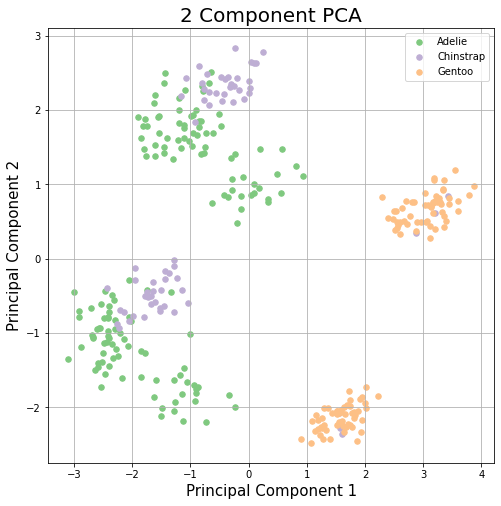

In [65]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

colors = ["#7fc97f","#beaed4","#fdc086"]
for label, color in zip(labels, colors):
  indicesToKeep = finalDataFrame['species'] == label
  ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)

ax.legend(labels)
ax.grid()

## 🔥 도전 과제

모두 하면 됩니다.

### 1.  "One-hot-encoding"을 이용하여 categorical 데이터를 numerical 하게 변환시켜서 PCA를 다시 시행해보세요.

### 2. "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


In [66]:
df = sns.load_dataset("penguins")
df = df.dropna()

In [67]:
df1 = pd.get_dummies(df.island, prefix='island')
df2 = pd.get_dummies(df.sex, prefix='sex')

In [68]:
df = pd.concat([df,df1,df2], axis=1)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,0,1,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,0,1,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0,1,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,0,1,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,1,0,0,1,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1,0,0,1,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1,0,0,0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1,0,0,1,0


In [69]:
del df['island']
del df['sex']

In [70]:
df.head(50)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,1
6,Adelie,38.9,17.8,181.0,3625.0,0,0,1,1,0
7,Adelie,39.2,19.6,195.0,4675.0,0,0,1,0,1
12,Adelie,41.1,17.6,182.0,3200.0,0,0,1,1,0
13,Adelie,38.6,21.2,191.0,3800.0,0,0,1,0,1
14,Adelie,34.6,21.1,198.0,4400.0,0,0,1,0,1


In [71]:
x = df.loc[:,['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_Female','sex_Male']].values
y = df.loc[:,['species']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-0.89604189,  0.7807321 , -1.42675157, ...,  2.46680084,
        -0.99103121,  0.99103121],
       [-0.82278787,  0.11958397, -1.06947358, ...,  2.46680084,
         1.00904996, -1.00904996],
       [-0.67627982,  0.42472926, -0.42637319, ...,  2.46680084,
         1.00904996, -1.00904996],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796, ..., -0.40538335,
        -0.99103121,  0.99103121],
       [ 0.22108196, -1.20271231,  0.78837197, ..., -0.40538335,
         1.00904996, -1.00904996],
       [ 1.08181673, -0.54156417,  0.85982757, ..., -0.40538335,
        -0.99103121,  0.99103121]])

In [72]:
pca = PCA(2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [73]:
finalDataFrame = pd.concat([principalDf, df[['species']]], axis=1)

In [74]:
labels = []
yList = y.tolist()
for label in yList:
  if label[0] not in labels:
    labels.append(label[0])

labels

['Adelie', 'Chinstrap', 'Gentoo']

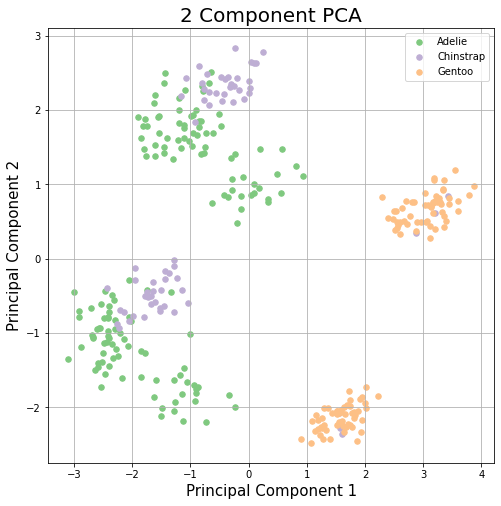

In [75]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

colors = ["#7fc97f","#beaed4","#fdc086"]
for label, color in zip(labels, colors):
  indicesToKeep = finalDataFrame['species'] == label
  ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)

ax.legend(labels)
ax.grid()



---



In [86]:
data = df[df.columns[1:]]
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,0,0,1,0




---



In [106]:
pca = PCA(n_components=9)
pca_fit = pca.fit(data)

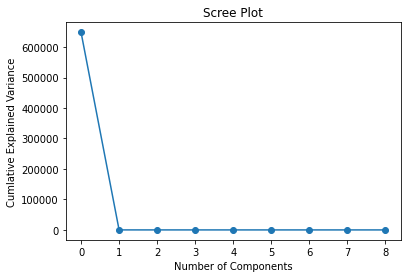

In [107]:
plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Cumlative Explained Variance")
plt.plot(pca.explained_variance_, 'o-')

In [104]:
pca.explained_variance_ratio_

array([9.99891902e-01, 7.82636130e-05, 2.50754032e-05, 3.94866930e-06,
       3.12759683e-07, 2.79122639e-07, 2.18468593e-07, 1.59906606e-38,
       7.91189115e-39])

In [108]:
print(pca.explained_variance_ratio_.cumsum())

[0.9998919  0.99997017 0.99999524 0.99999919 0.9999995  0.99999978
 1.         1.         1.        ]


# PC 1 만으로도 99%의 변동을 설명할수 있다.